# Q1: A medical test is designed to detect a certain disease. The test is not perfect, and we know the following:
- The probability that a person has the disease is 5%
- The probability that the test correctly identifies a person with the disease is 98%.

What is the probability that a person has the disease given that the test result is positive?  Calculate and provide the answer as code.

In [2]:
'''
Bayes' theorem states that P(A|B) = P(B|A) * P(A) / P(B)

D = person has the disease
T = test result is positive
P(D|T) = P(T|D) * P(D) / P(T)
p(D) = P_D
p(T|D) = P_T_D
p(T|ND) = P_T_ND
p(ND) = P_ND
p(T) = P_T_D * P_D + P_T_ND * P_ND
p(D|T) = P_T_D * P_D / P_T

'''

"\nBayes' theorem states that P(A|B) = P(B|A) * P(A) / P(B)\n\nD = person has the disease\nT = test result is positive\nP(D|T) = P(T|D) * P(D) / P(T)\np(D) = P_D\np(T|D) = P_T_D\np(T|ND) = P_T_ND\np(ND) = P_ND\np(T) = P_T_D * P_D + P_T_ND * P_ND\np(D|T) = P_T_D * P_D / P_T\n\n"

In [3]:
def probs(prob1, prob2):
  """
  Returns the probability that a person has the disease given that the test result is positive.

  Args:
    prob1: The probability that a person has the disease.
    prob2: The probability that the test correctly identifies a person with the disease.
  """
  try:
    # set variables
    P_D = prob1/100
    P_T_D = prob2/100

    # Calculate the probability of a false positive.
    P_T_ND = 1 - P_T_D

    # Calculate the total probability of a positive test result.
    P_ND = 1 - P_D

    # Use the law of total probability to calculate P(T).
    P_T = P_T_D * P_D + P_T_ND * P_ND

    # Use Bayes' theorem to calculate P(D|T).
    P_D_T = P_T_D * P_D / P_T
  except:
    print('Please enter a valid probability')
  return print(f'The probability that a person has the disease given that the test result is positive is approximately {P_D_T}')

probs(prob1=5, prob2=98)

The probability that a person has the disease given that the test result is positive is approximately 0.7205882352941175


# Q2 (in parts): Using the credit card data set provided on Blackboard.  Perform anomaly detection via the following steps.
- Perform EDA (use visuals where appropriate).  Pay attention to the class balance.  Is the data balanced?
- Test train split the data.  Ensure class balance is maintained.
- Scale the data with a standard scaler.
-- Add a markdown cell and discuss the problem of information leakage from train to test if scaling takes place before test train split.
- Use a grid search to arrive at best hyperparameters for 2 models.
-- Isolation Forest
-- DBSCAN or OCSVM (OCSVM may take a while)
-- Display the optimal parameters
- Train and test models.
-- Provide performance metrics. (e.g., F1, Precision, Recall)
-- Show confusion matrices and ROC AUC curves.
- Use PCA to reduce features to account for 80% of the variance in the data.
-- Train and test again to compare.
- Analyze results.  What conclusions can you make about the models’ ability to detect anomalies.  Which approaches worked best?

In [5]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

In [6]:
# Load the dataset using pandas
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
len(df)

284807

C:\Users\berna\AppData\Local\Temp\ipykernel_32068\1810241019.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['Class'], sort = True)


Text(0, 0.5, 'Frequency')

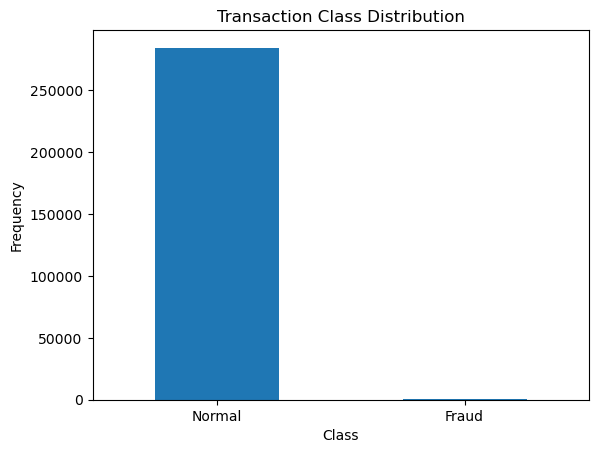

In [8]:
LABELS = ["Normal", "Fraud"]
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [9]:
# Count the number of normal vs fraud
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [10]:
'''
The dataset is not balanced.  There are more normal transactions than fraudulent transactions.
'''

# Calculating the class imbalance
imbalance = (df['Class'] == 1).sum() / ((df['Class'] == 0).sum() + (df['Class'] == 1).sum())
print(f"The class imbalance is {imbalance}")

The class imbalance is 0.001727485630620034


In [11]:
# Establishing the independent variables or features and dependent variable or target variable.
X = df.drop(columns = 'Class')    # X represents features
y = df['Class']                   # y is the target

In [12]:
# Split data with 70% training dataset and 30% testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) #stratify retains the class balance - important for imbalnced data

In [13]:
# Rransform the split dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # do not fit transform the test set.  only transform.

When one scales the whole dataset, the minimum and maximum values used to calculate the scaling parameters thus the mean and standard deviation will include information from both the training and testing sets. This means the training data is inadvertently using information from the test set to scale itself, which is not ideal for accurate evaluation.
By incorporating information from the test set into the scaling process, your model might learn patterns specific to the test data, leading to overfitting and poor performance on unseen data.

In [15]:
# Define the custom F1 scorer function (directly handle y_true and predictions)
def custom_f1_score(estimator, X, y_true):

    # Get the predictions: -1 for outliers, 1 for inliers
    try:
        y_pred = estimator.predict(X)
    except:
        y_pred = estimator.fit_predict(X)

    # Convert predictions from {-1, 1} to binary {0, 1} for F1 score calculation
    y_pred_binary = np.where(y_pred == -1, 1, 0)  # Convert -1 (outliers) to 1 and 1 (inliers) to 0

    # Ensure y_true is in binary format (outliers = 0, inliers = 1)
    # y_true_binary = np.where(y_true == 1, 0, 1)  # Convert outliers to 0 and inliers to 1

    # Calculate F1 score
    return f1_score(y_true, y_pred_binary)

In [16]:
# Define the Isolation Forest model
iso_forest = IsolationForest(random_state=42)

# Use GridSearchCV with the custom F1 scorer
param_grid_iforest = {
    'n_estimators': [50, 100, 200],
    'max_samples': [.5, 0.75],
    'contamination': [.01, .05, .1],
    'max_features': [0.5, .75]
    # 'n_estimators': [50],
    # 'max_samples': [.75],
    # 'contamination': [.0017],
    # 'max_features': [.5]
}

grid_search_iforest = GridSearchCV(iso_forest, param_grid_iforest, scoring=custom_f1_score, cv=3, verbose=2)
grid_search_iforest.fit(X_train_scaled, y_train)

best_model = grid_search_iforest.best_estimator_

# Output best parameters and best F1 score
print("Best Parameters:", grid_search_iforest.best_params_)
print("Best F1 Score:", grid_search_iforest.best_score_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END contamination=0.01, max_features=0.5, max_samples=0.5, n_estimators=50; total time=   1.8s
[CV] END contamination=0.01, max_features=0.5, max_samples=0.5, n_estimators=50; total time=   2.0s
[CV] END contamination=0.01, max_features=0.5, max_samples=0.5, n_estimators=50; total time=   1.9s
[CV] END contamination=0.01, max_features=0.5, max_samples=0.5, n_estimators=100; total time=   3.5s
[CV] END contamination=0.01, max_features=0.5, max_samples=0.5, n_estimators=100; total time=   3.5s
[CV] END contamination=0.01, max_features=0.5, max_samples=0.5, n_estimators=100; total time=   3.4s
[CV] END contamination=0.01, max_features=0.5, max_samples=0.5, n_estimators=200; total time=   7.1s
[CV] END contamination=0.01, max_features=0.5, max_samples=0.5, n_estimators=200; total time=   7.0s
[CV] END contamination=0.01, max_features=0.5, max_samples=0.5, n_estimators=200; total time=   7.1s
[CV] END contamination=0.01, max

In [17]:
print("Best Parameters:", grid_search_iforest.best_params_)
print("Best F1 Score:", grid_search_iforest.best_score_)

Best Parameters: {'contamination': 0.01, 'max_features': 0.5, 'max_samples': 0.75, 'n_estimators': 200}
Best F1 Score: 0.2126094280330146


In [18]:
grid_search_iforest.best_estimator_

IsolationForest(contamination=0.01, max_features=0.5, max_samples=0.75,
                n_estimators=200, random_state=42)

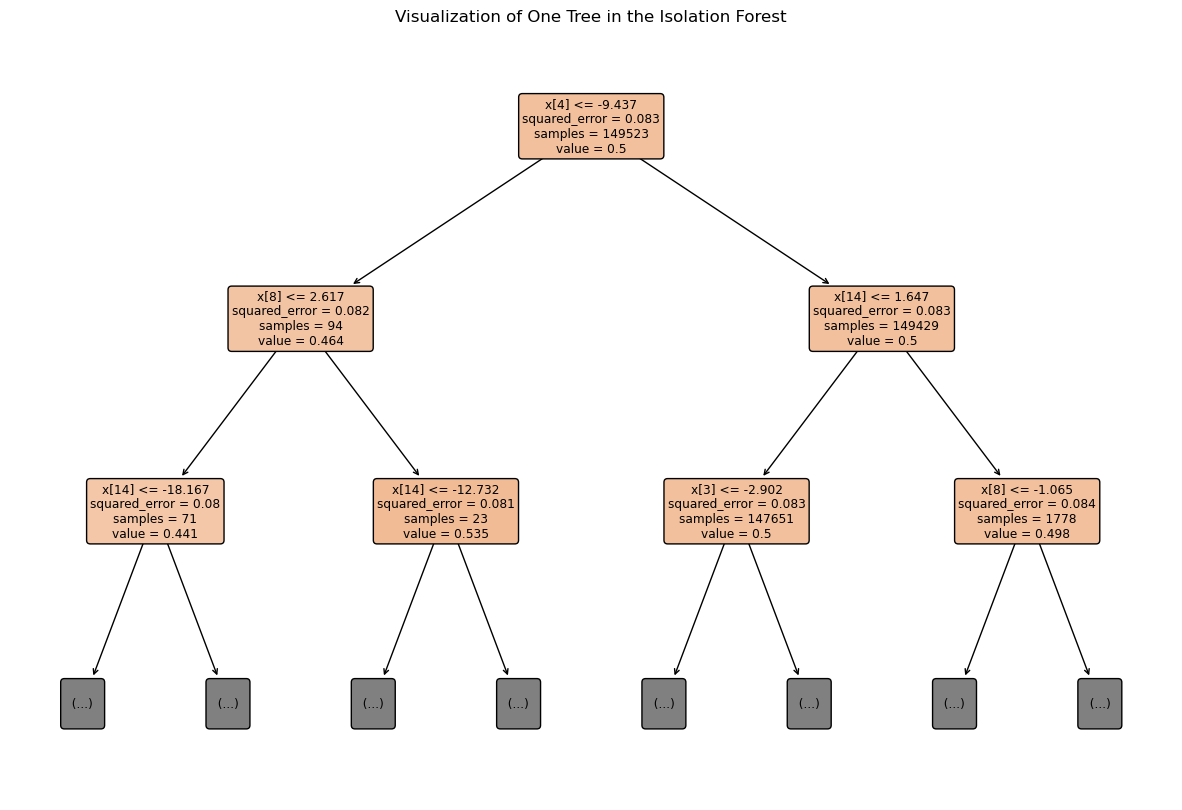

In [19]:
from sklearn.tree import plot_tree

tree = grid_search_iforest.best_estimator_.estimators_[4]  # Get the first tree

# Visualize the tree
plt.figure(figsize=(15, 10))
plot_tree(tree, filled=True, rounded=True, max_depth=2)
plt.title("Visualization of One Tree in the Isolation Forest")
plt.show()

In [20]:
# DBSCAN model
dbscan = DBSCAN()

# Custom scorer function for F1 score
def custom_f1_scorer(estimator, X, y_true):
    y_pred = estimator.fit_predict(X)
    y_pred_binary = (y_pred == -1).astype(int)  # Convert DBSCAN output (-1 for outliers) to 1 for outliers
    return f1_score(y_true, y_pred_binary)

# Create custom scorer
scorer = make_scorer(custom_f1_scorer, greater_is_better=True)

# Grid search over DBSCAN hyperparameters
param_grid = {
    'eps': [.01, .05, 1, 2],      # Maximum distance for neighbors
    'min_samples': [2, 3],         # Minimum number of points to form a dense region
#     'eps': [.3],      # Maximum distance for neighbors
#     'min_samples': [3],         # Minimum number of points to form a dense region
}

grid_search_dbs = GridSearchCV(dbscan, param_grid, scoring=custom_f1_scorer, cv=3, verbose=2)
grid_search_dbs.fit(X_train_scaled, y_train)


# Best parameters and score
print("Best Parameters:", grid_search_dbs.best_params_)
print("Best F1 Score:", grid_search_dbs.best_score_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ............................eps=0.01, min_samples=2; total time=  18.4s
[CV] END ............................eps=0.01, min_samples=2; total time=  18.4s
[CV] END ............................eps=0.01, min_samples=2; total time=  20.2s
[CV] END ............................eps=0.01, min_samples=3; total time=  20.4s
[CV] END ............................eps=0.01, min_samples=3; total time=  18.0s
[CV] END ............................eps=0.01, min_samples=3; total time=  20.9s
[CV] END ............................eps=0.05, min_samples=2; total time=  20.6s
[CV] END ............................eps=0.05, min_samples=2; total time=  19.9s
[CV] END ............................eps=0.05, min_samples=2; total time=  17.3s
[CV] END ............................eps=0.05, min_samples=3; total time=  17.6s
[CV] END ............................eps=0.05, min_samples=3; total time=  18.8s
[CV] END ............................eps=0.05, mi

In [ ]:
grid_search_dbs.best_estimator_

In [21]:
#
classifiers = {
    "Isolation Forest":grid_search_iforest.best_estimator_,
    "DBSCAN":grid_search_dbs.best_estimator_
}

Isolation Forest: 806
Accuracy Score :
0.9905668106222862
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.12      0.69      0.20       148

    accuracy                           0.99     85443
   macro avg       0.56      0.84      0.60     85443
weighted avg       1.00      0.99      0.99     85443



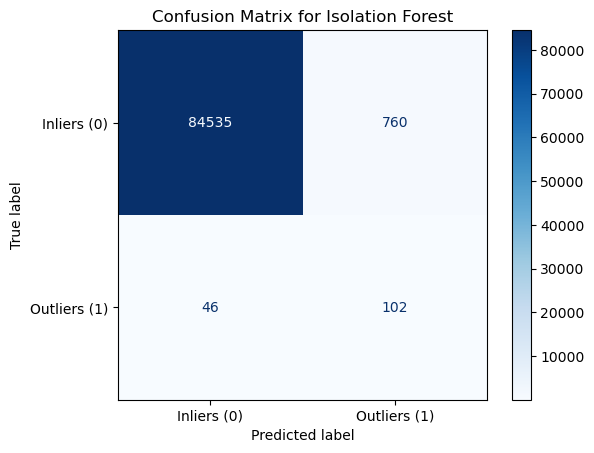

DBSCAN: 17950
Accuracy Score :
0.7899184251489297
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.79      0.88     85295
           1       0.01      0.78      0.01       148

    accuracy                           0.79     85443
   macro avg       0.50      0.79      0.45     85443
weighted avg       1.00      0.79      0.88     85443



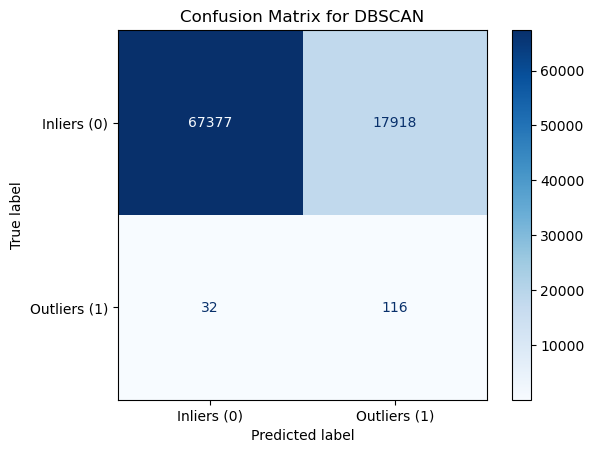

In [22]:
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor" :
        y_pred = clf.fit_predict(X_test_scaled)
        # scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "DBSCAN" :
        y_pred = clf.fit_predict(X_test_scaled)
        y_pred = (y_pred == -1).astype(int)  # Convert DBSCAN output (-1 for outliers) to 1 for outliers

    elif clf_name == "One Class SVM":
        # clf.fit(X)
        y_pred = clf.predict(X_test_scaled)
    else:
        #clf.fit(X)
        scores_prediction = clf.predict(X_test_scaled)
        y_pred = clf.predict(X_test_scaled)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    if clf_name != "DBSCAN":
        y_pred[y_pred == 1] = 0
        y_pred[y_pred == -1] = 1
    n_errors = (y_pred != y_test).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(y_test,y_pred))
    print("Classification Report :")
    print(classification_report(y_test,y_pred))

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Inliers (0)", "Outliers (1)"])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix for {clf_name}")
    plt.show()

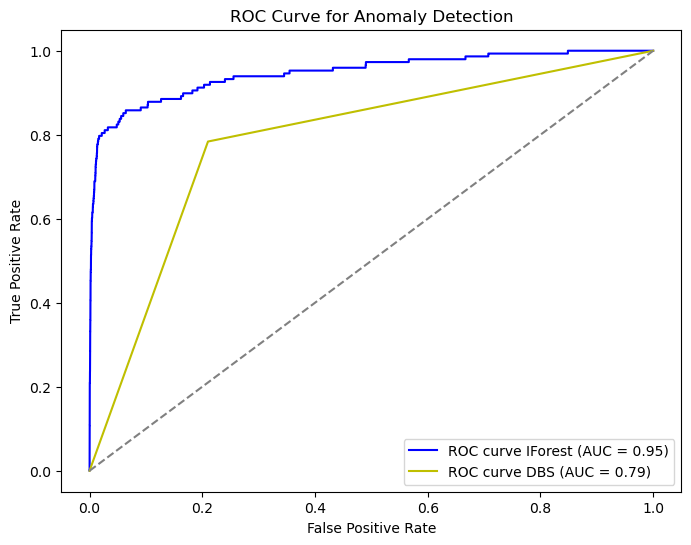

In [23]:
y_scores_if = grid_search_iforest.best_estimator_.decision_function(X_test_scaled)  # Anomaly score (the decision function)
y_scores_dbs = grid_search_dbs.best_estimator_.labels_  # Anomaly score (the decision function)

y_scores_if = -y_scores_if
y_scores_dbs = (y_scores_dbs == -1).astype(int)


fpr_if, tpr_if, _ = roc_curve(y_test, y_scores_if)  # True Positive Rate, False Positive Rate
roc_auc_if = auc(fpr_if, tpr_if)  # Compute the AUC (Area Under Curve)

fpr_dbs, tpr_dbs, _ = roc_curve(y_test, y_scores_dbs)  # True Positive Rate, False Positive Rate
roc_auc_dbs = auc(fpr_dbs, tpr_dbs)  # Compute the AUC (Area Under Curve)


plt.figure(figsize=(8, 6))
plt.plot(fpr_if, tpr_if, color='b', label=f'ROC curve IForest (AUC = {roc_auc_if:.2f})')
plt.plot(fpr_dbs, tpr_dbs, color='y', label=f'ROC curve DBS (AUC = {roc_auc_dbs:.2f})')


plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.title('ROC Curve for Anomaly Detection')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

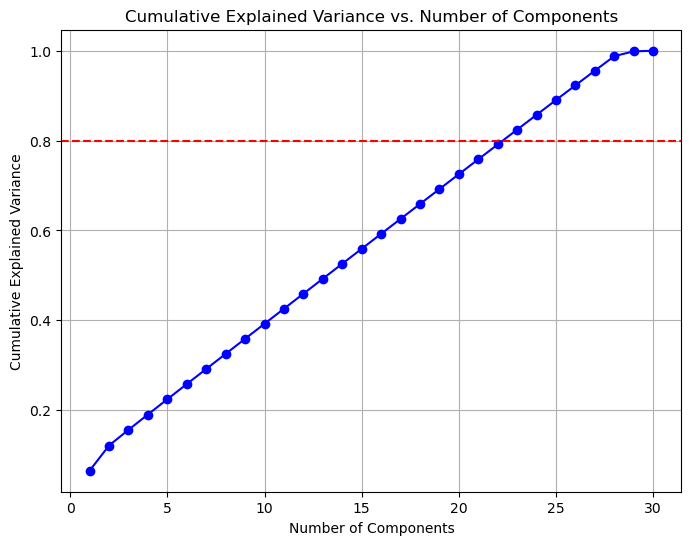

Number of components to retain 80% variance: 23
Original training data shape: (199364, 30)
Transformed training data shape: (199364, 23)
Original test data shape: (85443, 30)
Transformed test data shape: (85443, 23)


In [24]:
# Using the PCA to reduce dimensionality
pca = PCA()
pca.fit(X_train_scaled)

# Step 5: Explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Step 6: Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Step 7: Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', color='b')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.8, color='r', linestyle='--')  # 90% threshold
plt.show()

# Step 8: Choose the number of components that explain 95% of the variance
n_components = np.argmax(cumulative_explained_variance >= 0.8) + 1  # Add 1 because index is 0-based
print(f"Number of components to retain 80% variance: {n_components}")

# Step 9: Transform the training and test data using the optimal number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled) # again do not fit on the test set.  that leaks information from train.

# Step 10: Print the shape of the transformed data
print(f"Original training data shape: {X_train_scaled.shape}")
print(f"Transformed training data shape: {X_train_pca.shape}")
print(f"Original test data shape: {X_test_scaled.shape}")
print(f"Transformed test data shape: {X_test_pca.shape}")

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END contamination=0.01, max_features=0.5, max_samples=0.5, n_estimators=50; total time=   6.9s
[CV] END contamination=0.01, max_features=0.5, max_samples=0.5, n_estimators=50; total time=   7.0s
[CV] END contamination=0.01, max_features=0.5, max_samples=0.5, n_estimators=50; total time=   6.7s
[CV] END contamination=0.01, max_features=0.5, max_samples=0.5, n_estimators=100; total time=  13.4s
[CV] END contamination=0.01, max_features=0.5, max_samples=0.5, n_estimators=100; total time=  13.8s
[CV] END contamination=0.01, max_features=0.5, max_samples=0.5, n_estimators=100; total time=  13.5s
[CV] END contamination=0.01, max_features=0.5, max_samples=0.5, n_estimators=200; total time=  27.5s
[CV] END contamination=0.01, max_features=0.5, max_samples=0.5, n_estimators=200; total time=  27.4s
[CV] END contamination=0.01, max_features=0.5, max_samples=0.5, n_estimators=200; total time=  27.9s
[CV] END contamination=0.01, max

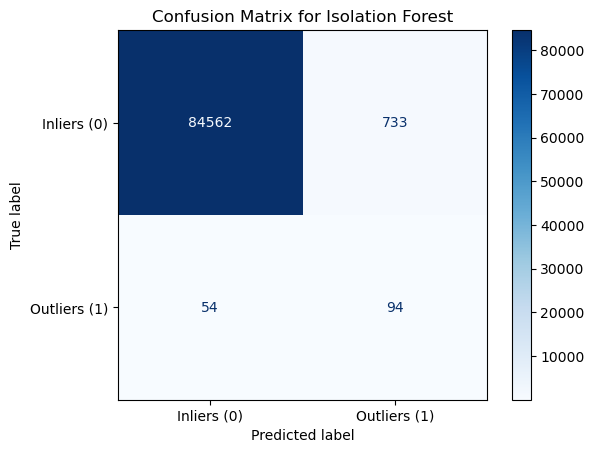

DBSCAN: 12727
Accuracy Score :
0.8510468967615837
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.85      0.92     85295
           1       0.01      0.76      0.02       148

    accuracy                           0.85     85443
   macro avg       0.50      0.81      0.47     85443
weighted avg       1.00      0.85      0.92     85443



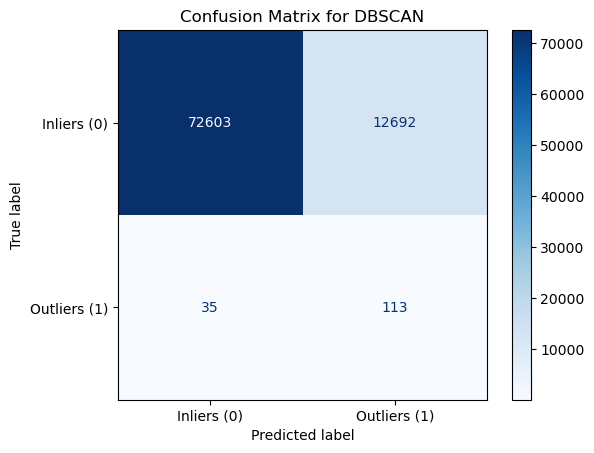

In [25]:
# Define the Isolation Forest model
iso_forest = IsolationForest(random_state=42)
grid_search_iforest = GridSearchCV(iso_forest, param_grid_iforest, scoring=custom_f1_score, cv=3, verbose=2)
grid_search_iforest.fit(X_train_pca, y_train)

# DBSCAN model
dbscan = DBSCAN()
grid_search_dbs = GridSearchCV(dbscan, param_grid, scoring=custom_f1_scorer, cv=3, verbose=2)
grid_search_dbs.fit(X_train_pca, y_train)


classifiers = {
    "Isolation Forest":grid_search_iforest.best_estimator_,
    "DBSCAN":grid_search_dbs.best_estimator_
}

for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor" :
        y_pred = clf.fit_predict(X_test_pca)
        # scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "DBSCAN" :
        y_pred = clf.fit_predict(X_test_pca)
        y_pred = (y_pred == -1).astype(int)  # Convert DBSCAN output (-1 for outliers) to 1 for outliers

    elif clf_name == "One Class SVM":
        # clf.fit(X)
        y_pred = clf.predict(X_test_pca)
    else:
        # clf.fit(X_test_pca)
        scores_prediction = clf.predict(X_test_pca)
        y_pred = clf.predict(X_test_pca)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    if clf_name != "DBSCAN":
        y_pred[y_pred == 1] = 0
        y_pred[y_pred == -1] = 1
    n_errors = (y_pred != y_test).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(y_test,y_pred))
    print("Classification Report :")
    print(classification_report(y_test,y_pred))

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Inliers (0)", "Outliers (1)"])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix for {clf_name}")
    plt.show()

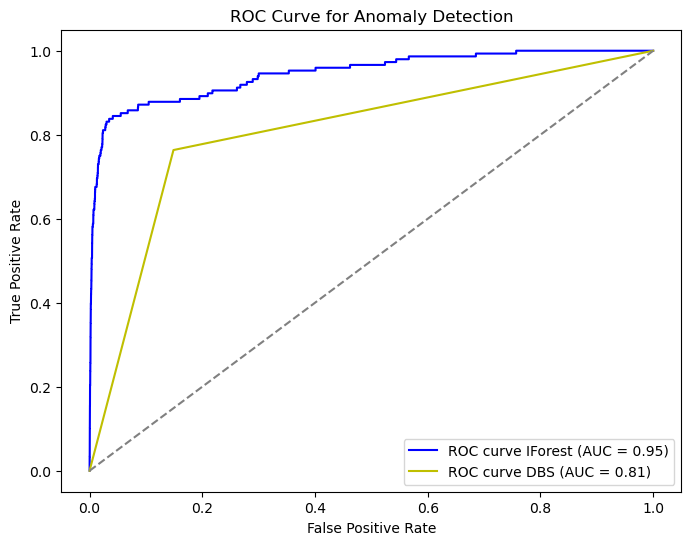

In [26]:
y_scores_if = grid_search_iforest.best_estimator_.decision_function(X_test_pca)  # Anomaly score (the decision function)
y_scores_dbs = grid_search_dbs.best_estimator_.labels_  # Anomaly score (the decision function)

y_scores_if = -y_scores_if
y_scores_dbs = (y_scores_dbs == -1).astype(int)


fpr_if, tpr_if, _ = roc_curve(y_test, y_scores_if)  # True Positive Rate, False Positive Rate
roc_auc_if = auc(fpr_if, tpr_if)  # Compute the AUC (Area Under Curve)

fpr_dbs, tpr_dbs, _ = roc_curve(y_test, y_scores_dbs)  # True Positive Rate, False Positive Rate
roc_auc_dbs = auc(fpr_dbs, tpr_dbs)  # Compute the AUC (Area Under Curve)


plt.figure(figsize=(8, 6))
plt.plot(fpr_if, tpr_if, color='b', label=f'ROC curve IForest (AUC = {roc_auc_if:.2f})')
plt.plot(fpr_dbs, tpr_dbs, color='y', label=f'ROC curve DBS (AUC = {roc_auc_dbs:.2f})')


plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.title('ROC Curve for Anomaly Detection')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()